In [4]:
import matplotlib.pyplot as plt
import numpy as np

KeyboardInterrupt: 

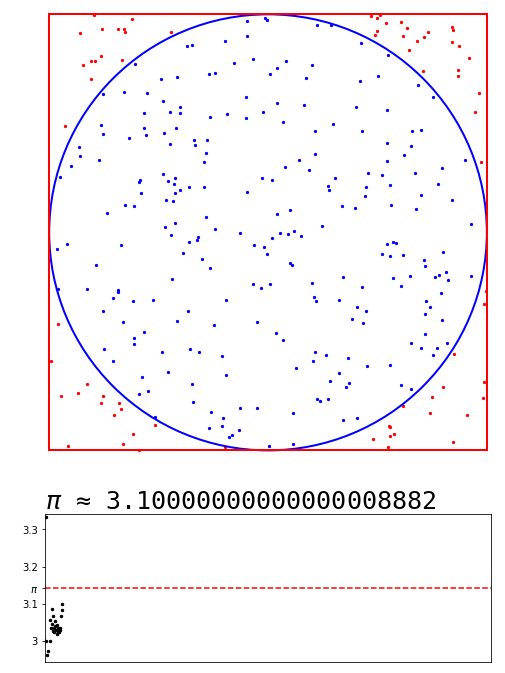

In [3]:
#LINEAR SCALE 

import matplotlib.gridspec as gridspec
plt.figure(figsize=(8,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1], width_ratios=[3])

frames=800

ax1 = plt.subplot(gs[0])
ax1.axis('off')
plt.ylim(-1.02,1.02)
plt.xlim(-1.02,1.02)
ax1.plot([-1,1], [1,1], 'r-', linewidth=2)
ax1.plot([-1,1], [-1,-1], 'r-', linewidth=2)
ax1.plot([-1,-1], [-1,1], 'r-', linewidth=2)
ax1.plot([1,1], [-1,1], 'r-', linewidth=2)
circle1 = plt.Circle((0,0), radius=1, color='b', linewidth=2, fill=False)
ax1.add_artist(circle1)
ax2 = plt.subplot(gs[1])
plt.ylim(2.9416, 3.3416)
plt.xlim(0,frames)
plt.xticks([])
plt.yticks([3, 3.1, 3.1416, 3.2, 3.3], [3, 3.1, r'$\pi$', 3.2, 3.3])
ax2.axhline(y=3.1416, color='r', linestyle='--')

c = 0
tot = 0
for i in range(frames): #each image
    for j in range(10): #each point
        x,y = np.random.uniform(-1,1,2)
        tot = tot+1
        if ((x*x) + (y*y) <= 1):
            c=c+1
            color='b'
        else:
            color='r'
        ax1.scatter(x, y, color=color, s=5)
    p = 4*(c/tot)
    ax2.scatter(i, p, color='k', s=6)
    title = '$\pi$ ≈ ' + ("%0.20f" % p)
    plt.title(title, loc='left', fontsize=25, fontname='monospace')
    plt.savefig('p/'+str(i)+'.png')

In [ ]:
#LOG SCALE

import matplotlib.gridspec as gridspec
plt.figure(figsize=(6.8,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1], width_ratios=[3])

max_num = 10000000
frames= int(10*np.log10(max_num))

ax1 = plt.subplot(gs[0])
ax1.axis('off')
plt.ylim(-1.02,1.02)
plt.xlim(-1.02,1.02)
for x_c, y_c in zip([[-1,1], [-1,1], [-1,-1], [1,1]], [[1,1], [-1,-1], [-1,1], [-1,1]]):
    ax1.plot(x_c, y_c, 'r-', linewidth=2)
circle1 = plt.Circle((0,0), radius=1, color='b', linewidth=2, fill=False)
ax1.add_artist(circle1)
ax2 = plt.subplot(gs[1])
plt.ylim(2.9416, 3.3416)
plt.xlim(0,frames)
plt.yticks([3, 3.1, 3.1416, 3.2, 3.3], [3, 3.1, r'$\pi$', 3.2, 3.3])
ax2.axhline(y=3.1416, color='r', linestyle='--')

x_bottom_pos = [0]
x_bottom_lab = [0]
c = 0
tot = 0

for i in range(frames): #each image
    if(i==0 or i%10 != 0):
        x_ar = []
        y_ar = []
        c_ar = []
        r = 10**(int((i)/10)+1)
        for j in range(r): #each point
            x,y = np.random.uniform(-1,1,2)
            tot = tot+1
            if ((x**2) + (y**2) <= 1):
                c=c+1
                c_ar.append('b')
            else:
                c_ar.append('r')
            x_ar.append(x)
            y_ar.append(y)
        ax1.scatter(x_ar, y_ar, color=c_ar, s=3.5, alpha=0.7)
        title = 'i = ' + str(tot)
        #plt.title(title, fontsize=20, fontname='monospace', loc='left')
        p = 4*(c/tot)
        ax2.scatter(i, p, color='k', s=8)
        title = '$\pi$ ≈ ' + ("%0.16f" % p)
        plt.title(title, loc='left', fontsize=25, fontname='monospace')
        print('i is ' + str(i) + ', tot is ' + str(tot) + ', r is ' + str(r))
        if(tot==(r*10)):
            x_bottom_pos.append(i)
            x_bottom_lab.append(tot)
        plt.xticks(x_bottom_pos, x_bottom_lab)
        plt.savefig('p2/'+str(i)+'.png')

i is 0, tot is 10, r is 10
i is 1, tot is 20, r is 10
i is 2, tot is 30, r is 10
i is 3, tot is 40, r is 10
i is 4, tot is 50, r is 10
i is 5, tot is 60, r is 10
i is 6, tot is 70, r is 10
i is 7, tot is 80, r is 10
i is 8, tot is 90, r is 10
i is 9, tot is 100, r is 10
i is 11, tot is 200, r is 100
i is 12, tot is 300, r is 100
i is 13, tot is 400, r is 100
i is 14, tot is 500, r is 100
i is 15, tot is 600, r is 100
i is 16, tot is 700, r is 100
i is 17, tot is 800, r is 100
i is 18, tot is 900, r is 100
i is 19, tot is 1000, r is 100
i is 21, tot is 2000, r is 1000
i is 22, tot is 3000, r is 1000
i is 23, tot is 4000, r is 1000
i is 24, tot is 5000, r is 1000
i is 25, tot is 6000, r is 1000
i is 26, tot is 7000, r is 1000
i is 27, tot is 8000, r is 1000
i is 28, tot is 9000, r is 1000
i is 29, tot is 10000, r is 1000
i is 31, tot is 20000, r is 10000
i is 32, tot is 30000, r is 10000
i is 33, tot is 40000, r is 10000
i is 34, tot is 50000, r is 10000
i is 35, tot is 60000, r is 10000

In [2]:
#make animated visualizations 
import glob
import moviepy.editor as mpy

gif_name = 'pi2.gif'
fps = 3
file_list = glob.glob('p2/*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('/')[1].split('.')[0])) # Sort the images by #, this may need to be tweaked for your use case
for x in range(6):
    file_list.append(file_list[-1])
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif(gif_name, fps=fps)
    
#source: http://superfluoussextant.com/making-gifs-with-python.html


[MoviePy] Building file pi2.gif with imageio


100%|██████████| 70/70 [00:04<00:00, 17.18it/s]
